In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
# Load the dataset
data = pd.read_csv("dataset.csv")

In [117]:
data.head(10)

,Shot Name,Right Shoulder (x),Right Shoulder (y),Right Shoulder (z),Left Shoulder (x),Left Shoulder (y),Left Shoulder (z),Right Elbow (x),Right Elbow (y),Right Elbow (z),...,Right Knee (z),Left Knee (x),Left Knee (y),Left Knee (z),Right Ankle (x),Right Ankle (y),Right Ankle (z),Left Ankle (x),Left Ankle (y),Left Ankle (z)
0,PullShot,0.465310,0.269960,0.172628,0.547472,0.254167,-0.055340,0.471516,0.329746,0.002717,...,0.040193,0.415400,0.684185,-0.134640,0.572050,0.868060,0.174761,0.351442,0.895315,-0.152276
1,PullShot,0.439750,0.260434,-0.051655,0.523411,0.275674,0.211819,0.406348,0.374402,-0.246784,...,-0.199845,0.525269,0.725391,0.037631,0.646897,0.884594,-0.244248,0.426373,0.857044,0.069269
2,PullShot,0.439966,0.264511,0.206872,0.503322,0.233798,-0.074470,0.411702,0.337425,0.040058,...,0.030399,0.449096,0.704329,-0.101243,0.635075,0.823422,0.097667,0.427999,0.926872,-0.109337
3,PullShot,0.447104,0.258514,-0.061657,0.514965,0.280504,0.233133,0.407898,0.372371,-0.210541,...,-0.167241,0.514899,0.730260,0.021074,0.647763,0.886656,-0.203697,0.424877,0.858575,-0.008327
4,PullShot,0.641250,0.345659,-0.048634,0.655779,0.440376,0.274575,0.551394,0.330605,-0.272942,...,-0.181323,0.371499,0.610556,0.032348,0.302837,0.830773,-0.243892,0.235468,0.532796,0.040307
5,PullShot,0.477980,0.273125,0.235729,0.551035,0.252401,-0.055334,0.459954,0.357784,0.084492,...,-0.006065,0.415366,0.675538,-0.140963,0.572730,0.861023,-0.003989,0.352073,0.888404,-0.173511
6,PullShot,0.432667,0.272029,-0.068063,0.496689,0.271336,0.208933,0.409019,0.380440,-0.259239,...,-0.213245,0.525353,0.700126,0.023289,0.647919,0.880045,-0.244471,0.429478,0.858538,0.037155
7,PullShot,0.365954,0.215423,-0.101410,0.458027,0.231298,0.079349,0.285014,0.244215,-0.365080,...,-0.236919,0.407860,0.664504,0.067303,0.529943,0.830128,-0.267624,0.303087,0.804929,0.129123
8,PullShot,0.273545,0.345318,-0.138228,0.364521,0.306815,0.032930,0.219260,0.437981,-0.347255,...,-0.183363,0.495720,0.696123,0.052919,0.655007,0.758317,-0.189554,0.451505,0.895515,0.041134
9,PullShot,0.426346,0.173166,-0.137313,0.519522,0.229941,0.045394,0.342000,0.169786,-0.408688,...,-0.232234,0.385038,0.623565,0.058100,0.467416,0.830199,-0.256000,0.253674,0.719395,0.111866


In [118]:
print("Number of Columns: " + str(len(data.count())))
print("Number of Rows: " + str(len(data)))

Number of Columns: 31
Number of Rows: 187


In [119]:
# Randomizing the dataset
data = data.sample(frac=1).reset_index()

In [120]:
data.head(10)

,index,Shot Name,Right Shoulder (x),Right Shoulder (y),Right Shoulder (z),Left Shoulder (x),Left Shoulder (y),Left Shoulder (z),Right Elbow (x),Right Elbow (y),...,Right Knee (z),Left Knee (x),Left Knee (y),Left Knee (z),Right Ankle (x),Right Ankle (y),Right Ankle (z),Left Ankle (x),Left Ankle (y),Left Ankle (z)
0,23,PullShot,0.260512,0.428775,0.049558,0.336991,0.348047,0.201364,0.224809,0.499583,...,-0.203891,0.528343,0.683233,0.029652,0.685105,0.708919,-0.264852,0.520300,0.904734,-0.011007
1,38,PullShot,0.451825,0.179209,0.068746,0.553969,0.304916,0.167794,0.411580,0.232664,...,-0.326800,0.500713,0.629423,-0.253809,0.465699,0.891179,-0.355007,0.432035,0.854642,-0.220062
2,68,Legglance-Flick Shot,0.596433,0.251635,-0.064160,0.691343,0.319542,0.141576,0.593310,0.390341,...,-0.176349,0.406767,0.735476,0.032672,0.593150,0.918754,-0.203447,0.247425,0.848373,-0.008754
3,158,Drive Shot,0.441646,0.246303,-0.088335,0.579031,0.256939,0.017047,0.532633,0.255148,...,-0.278634,0.632831,0.664371,-0.458129,0.131021,0.881194,-0.326119,0.492671,0.877429,-0.343554
4,81,Legglance-Flick Shot,0.526518,0.329742,-0.006875,0.509939,0.373413,0.497503,0.635570,0.380730,...,-0.209719,0.485178,0.694927,0.057026,0.488616,0.854015,-0.311703,0.368791,0.788854,-0.004635
5,10,PullShot,0.533797,0.225840,0.085929,0.629192,0.215946,-0.059348,0.535479,0.253506,...,0.039479,0.499040,0.642745,-0.199464,0.691005,0.799749,0.109389,0.456245,0.839785,-0.228291
6,56,Legglance-Flick Shot,0.193459,0.296437,-0.041985,0.287811,0.240992,-0.181129,0.235235,0.406746,...,-0.053528,0.379019,0.584275,-0.090647,0.349328,0.672625,0.188000,0.448008,0.735825,-0.003225
7,110,Sweep Shot,0.493810,0.240352,0.105328,0.619450,0.332596,0.241061,0.399247,0.291257,...,-0.252989,0.412944,0.898730,0.082169,0.758173,0.885304,-0.327199,0.228918,0.828367,0.220299
8,157,Drive Shot,0.221857,0.491339,-0.283164,0.237563,0.381548,-0.019886,0.296472,0.388647,...,-0.353608,0.710528,0.405614,-0.378886,0.808790,0.916840,-0.323760,0.906861,0.601362,-0.205167
9,37,PullShot,0.686669,0.349164,-0.003537,0.640580,0.514129,0.023258,0.651605,0.284137,...,-0.261772,0.409820,0.535750,-0.175249,0.240446,0.556622,-0.283188,0.257661,0.494891,-0.083570


In [121]:
data = data.drop(columns = {'index'})

In [122]:
# Number of Rows for each Shot Name
data["Shot Name"].value_counts()

PullShot                50
Legglance-Flick Shot    49
Sweep Shot              49
Drive Shot              39
Name: Shot Name, dtype: int64

In [123]:
# Split the data into features and labels
X = data.drop("Shot Name", axis=1)
y = data["Shot Name"]

In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Using Logistic Regression

In [126]:
# Initialize and train the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs') #['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [127]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [128]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5263157894736842


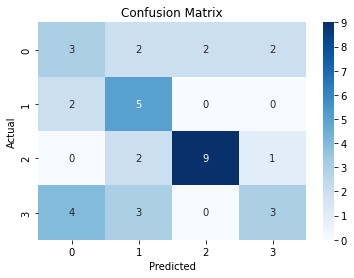

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Using Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [131]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [132]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7105263157894737


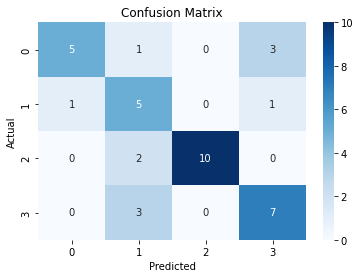

In [133]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Using Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [135]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [136]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.868421052631579


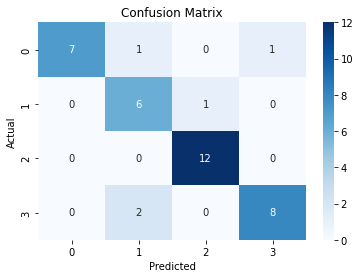

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Using Support Vector Machines

In [138]:
from sklearn import svm

# Initialize and train the model
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [139]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [140]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6052631578947368


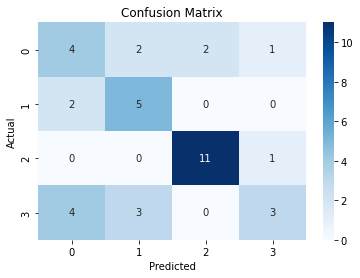

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Using Multi-layer Perceptron

In [177]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the model
model = MLPClassifier(hidden_layer_sizes=(150,4))
model.fit(X_train, y_train)

C:\Users\Musham Malik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 4))

In [178]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [179]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.47368421052631576


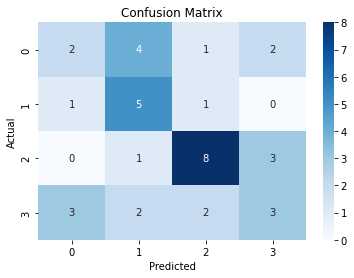

In [180]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Using K - Nearest Nieghbour

Using Elbow Method to determine the best value of N for the KNN Algorithm

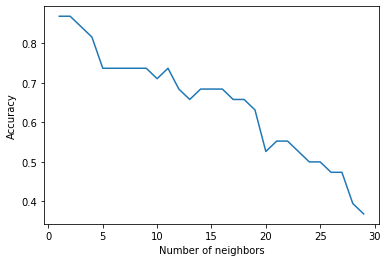

In [182]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create a list of values for the number of neighbors
neighbors = list(range(1, 30))

# Create an empty list to store the accuracy scores
accuracy = []

# Loop over the number of neighbors
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

# Plot the relationship between the number of neighbors and the accuracy
plt.plot(neighbors, accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [206]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class with the number of neighbors set to 5
knn = KNeighborsClassifier(n_neighbors=2)
# Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [207]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [208]:
# Print the accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.868421052631579


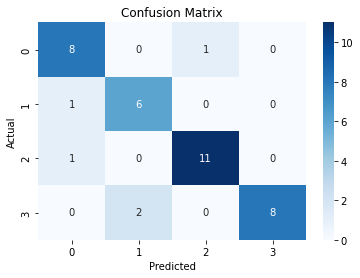

In [209]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap function
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()